In [1]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
from __future__ import division
from fatiando import mesher, gridder, utils
from fatiando.gravmag import polyprism
from fatiando.mesher import PolygonalPrism
from fatiando.gravmag import prism
from fatiando.mesher import Prism
from fatiando.vis import mpl, myv
from fatiando.constants import CM, T2NT
from matplotlib import colors, ticker, cm
from IPython.display import Image as img
import mag_polyprism_functions as mfun
import polyprism_tests as tests
% matplotlib inline

C:\Users\Vanderlei\Documents\fatiando\fatiando\vis\mpl.py:70: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")
C:\Users\Vanderlei\Documents\fatiando\fatiando\vis\myv.py:53: UserWarning: This module will be removed in v0.7.
  warnings.warn("This module will be removed in v0.7.")


In [2]:
#x = np.arange(1., 14., 1.)
x = np.linspace(1., 15., 20)

In [3]:
A = 10.
B = -10.
C = -1.
D = 5.

In [4]:
phi = A + B*(1./(1 + np.exp(C*(x - D))))

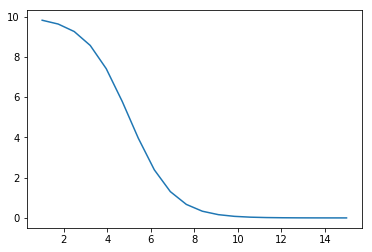

In [5]:
plt.plot(x,phi)

In [6]:
phi[7] = 4.
phi[8] = 5.

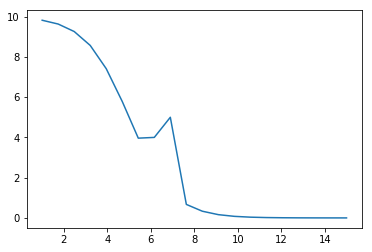

In [7]:
plt.plot(x,phi)

In [10]:
phi0 = 10.
itmax = 12
itmax_marq = 12
lamb = 0.001
dlamb = 5.
epsilon = 0.0001
k = -1
for it in range(itmax):
    # gradient and hessian computation
    for it_marq in range(itmax_marq):
        k += 1 # solve the linear system and compute a new phi
        dphi = phi[k] - phi0
        print '%3d %12.5e %3d %3d %12.5e' % (it, phi[k], k, it_marq, lamb)
        if (dphi > 0.):
            lamb *= dlamb
        else:
            lamb /= dlamb
            break
    relative_variation = abs(dphi/phi0)
    if (relative_variation > epsilon):
        phi0 = phi[k]
    else:
        print 'convergence achieved'
        break

  0  9.82014e+00   0   0  1.00000e-03
  1  9.63143e+00   1   0  2.00000e-04
  2  9.25966e+00   2   0  4.00000e-05
  3  8.56863e+00   3   0  8.00000e-06
  4  7.41280e+00   4   0  1.60000e-06
  5  5.78298e+00   5   0  3.20000e-07
  6  3.96265e+00   6   0  6.40000e-08
  7  4.00000e+00   7   0  1.28000e-08
  7  5.00000e+00   8   1  6.40000e-08
  7  6.71335e-01   9   2  3.20000e-07
  8  3.32971e-01  10   0  6.40000e-08
  9  1.62183e-01  11   0  1.28000e-08
 10  7.82865e-02  12   0  2.56000e-09
 11  3.76233e-02  13   0  5.12000e-10
